In [261]:
## Importing all needed packages

import pandas as pd
import numpy as np
import scipy.stats as stats
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import time
import warnings
import seaborn as seabornInstance 
import re
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
%matplotlib inline
warnings.filterwarnings('ignore')

In [262]:
### reading the data

raw_data = pd.read_csv("loans_full_schema.csv")
df = raw_data.copy()
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [263]:
## checking if there is any row which has all nan values and then dropping if any

df.dropna(how='all',inplace=True)

In [264]:
## checking if there are any duplicate rows

duplicateRowsDF = df[df.duplicated()]
print(duplicateRowsDF)

Empty DataFrame
Columns: [emp_title, emp_length, state, homeownership, annual_income, verified_income, debt_to_income, annual_income_joint, verification_income_joint, debt_to_income_joint, delinq_2y, months_since_last_delinq, earliest_credit_line, inquiries_last_12m, total_credit_lines, open_credit_lines, total_credit_limit, total_credit_utilized, num_collections_last_12m, num_historical_failed_to_pay, months_since_90d_late, current_accounts_delinq, total_collection_amount_ever, current_installment_accounts, accounts_opened_24m, months_since_last_credit_inquiry, num_satisfactory_accounts, num_accounts_120d_past_due, num_accounts_30d_past_due, num_active_debit_accounts, total_debit_limit, num_total_cc_accounts, num_open_cc_accounts, num_cc_carrying_balance, num_mort_accounts, account_never_delinq_percent, tax_liens, public_record_bankrupt, loan_purpose, application_type, loan_amount, term, interest_rate, installment, grade, sub_grade, issue_month, loan_status, initial_listing_status, di

In [265]:
## Exploring the data for missing values

stats = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
st.table(stats_df.sort_values('Percentage of missing values', ascending=False))

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
8,verification_income_joint,3,85.45,85.45,object
9,debt_to_income_joint,1189,85.05,85.05,float64
7,annual_income_joint,596,85.05,85.05,float64
20,months_since_90d_late,106,77.15,77.15,float64
11,months_since_last_delinq,97,56.58,56.58,float64
25,months_since_last_credit_inquiry,25,12.71,12.71,float64
0,emp_title,4741,8.33,8.33,object
1,emp_length,11,8.17,33.32,float64
27,num_accounts_120d_past_due,1,3.18,96.82,float64
6,debt_to_income,3673,0.24,0.28,float64


Looking at the above result we can see that few variables have alot of null values and we will be dropping variables having null values above 50%

The below variables will be dropped.
- verification_income_joint
- debt_to_income_joint
- annual_income_joint
- months_since_90d_late
- months_since_last_delinq


In [266]:
df.drop(stats_df[stats_df["Percentage of missing values"]>50]["Feature"], axis = 1, inplace=True)
#raw_data.drop(['verification_income_joint','debt_to_income_joint','annual_income_joint','months_since_90d_late','months_since_last_delinq'], axis=1, inplace=True)

num_accounts_120d_past_due : This variable has only one unique value and we will see whats going on with this next


In [267]:
df['num_accounts_120d_past_due'].value_counts()

0.0    9682
Name: num_accounts_120d_past_due, dtype: int64

This variables has only 0's and few records as null. We cannot do anything with this and hence will be dropping this one.

In [268]:
df.drop(['num_accounts_120d_past_due'], axis=1, inplace=True)

In [269]:
### checking for variables which have a very high concentration of values in only one category (above 90%)
high_cardinality = stats_df.loc[stats_df['Percentage of values in the biggest category']>=90  ]['Feature']
high_cardinality



18      num_collections_last_12m
21       current_accounts_delinq
27    num_accounts_120d_past_due
28     num_accounts_30d_past_due
36                     tax_liens
47                   loan_status
49           disbursement_method
54                paid_late_fees
Name: Feature, dtype: object

In [270]:
df.drop(['num_collections_last_12m','current_accounts_delinq','num_accounts_30d_past_due','tax_liens','loan_status','disbursement_method','paid_late_fees'],axis=1,inplace=True)

In [271]:
#Dropping all other Redundant Columns With No Meaning on the Target Variable

df.drop(['emp_title','earliest_credit_line','state',
         "emp_title","issue_month"], axis = 1, inplace=True)

In [272]:
# separating the data into numeric and categorical
numb_cols = df.select_dtypes(include=("int64","float64"))

cat_cols = df.select_dtypes(include=("object"))

In [273]:
numb_cols.columns

Index(['emp_length', 'annual_income', 'debt_to_income', 'delinq_2y',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_historical_failed_to_pay', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'months_since_last_credit_inquiry', 'num_satisfactory_accounts',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'public_record_bankrupt', 'loan_amount',
       'term', 'interest_rate', 'installment', 'balance', 'paid_total',
       'paid_principal', 'paid_interest'],
      dtype='object')

In [274]:
cat_cols.columns


Index(['homeownership', 'verified_income', 'loan_purpose', 'application_type',
       'grade', 'sub_grade', 'initial_listing_status'],
      dtype='object')

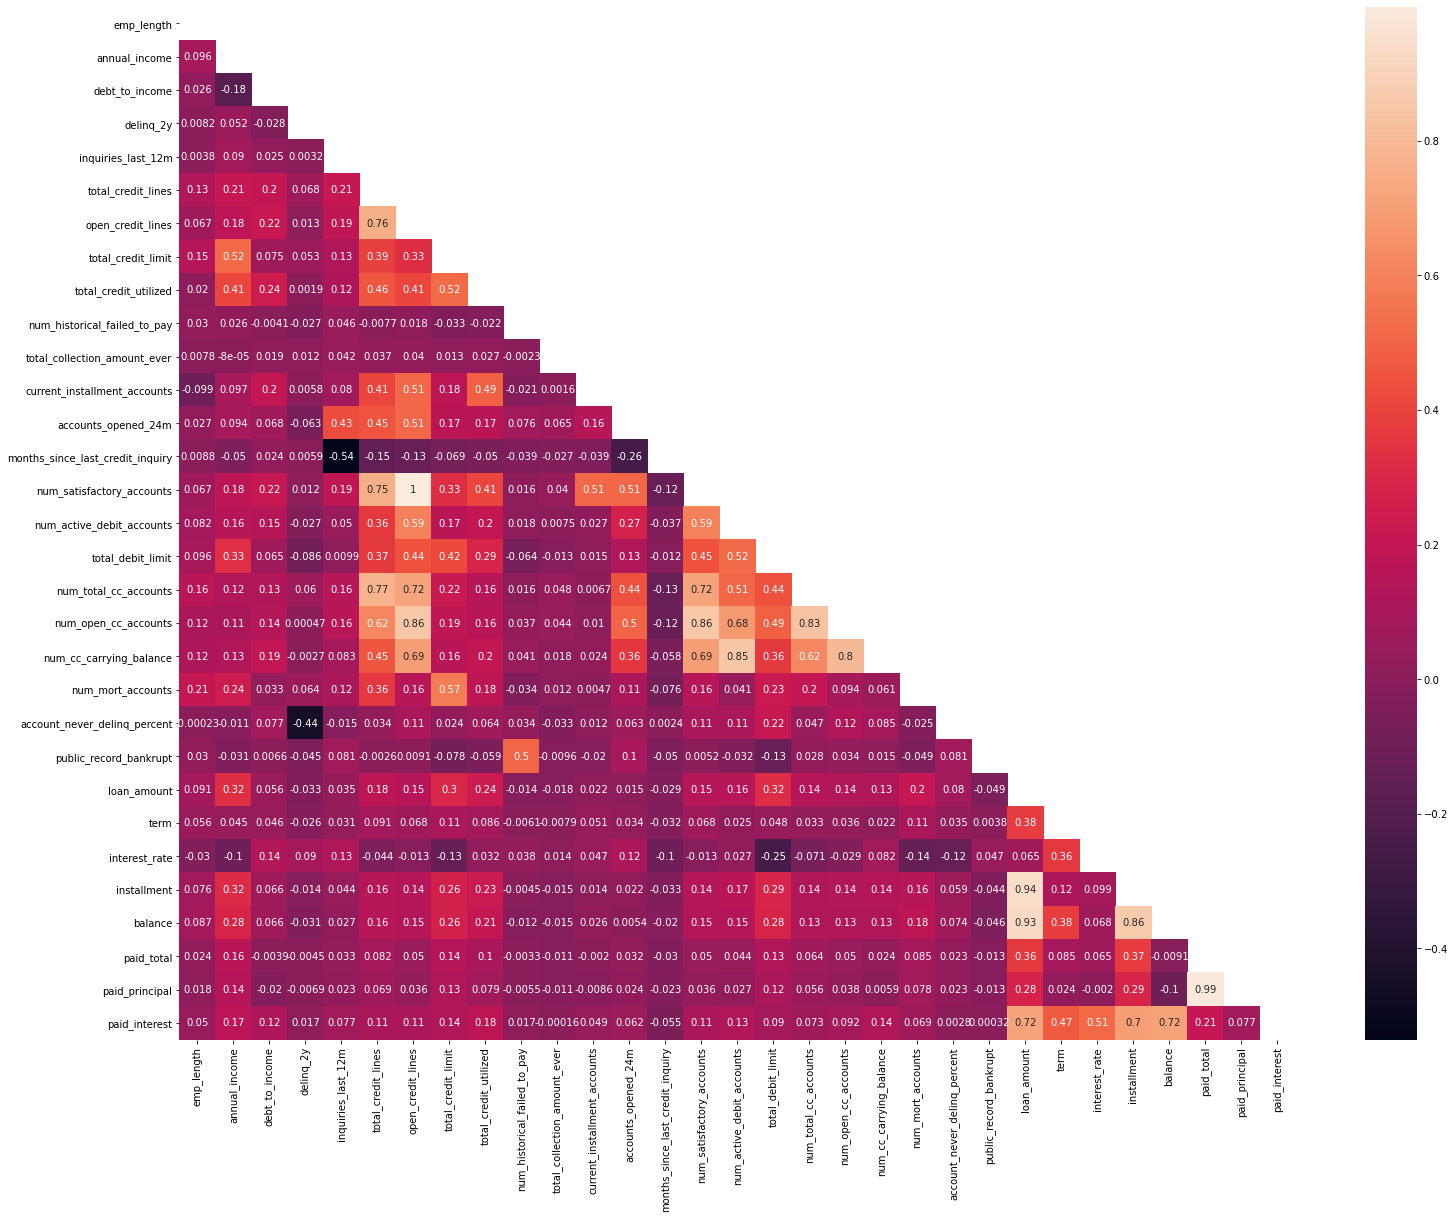

In [275]:
## Before we dummy encode the categorical variables we will remove 

corr_matrix = df.corr()
plt.subplots(figsize=(25,19))
mask = np.triu(corr_matrix.corr())
sns.heatmap(corr_matrix, annot=True, mask=mask)
plt.show()


Here we can see that there is a number of correlated variables with some being above 0.90. We will be keeping the threshold to 0.70 and remove those variables. Some interesting points to note are:

- There is high correlation between loan_amount and monthly installment and current balance on the loan.
- Another strange point is that after looking at the interest_rate variable as compared to the other variables, there is little to no correlation between them. 
- The numerical variables dont seem to have alot of correlation which can mean that the data is non-linear or there could be trend in out categorical variables.

In [276]:
## one hot encoding all the categorical variables

df = pd.get_dummies(df,columns=['homeownership', 'verified_income', 'loan_purpose', 'application_type',
       'grade', 'sub_grade', 'initial_listing_status'],drop_first=True)

In [277]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

In [278]:
to_drop

['open_credit_lines',
 'num_satisfactory_accounts',
 'num_total_cc_accounts',
 'num_open_cc_accounts',
 'num_cc_carrying_balance',
 'installment',
 'balance',
 'paid_principal',
 'paid_interest',
 'sub_grade_F1',
 'sub_grade_G1']

In [279]:
df.drop(['open_credit_lines','num_satisfactory_accounts','num_total_cc_accounts','num_open_cc_accounts','num_cc_carrying_balance','installment','balance','paid_principal','paid_interest'] ,axis=1,inplace=True)

In [280]:
### 
df.to_csv("cleaned_data.csv")